<a href="https://colab.research.google.com/github/bryantosin1/KUIS_ML1/blob/main/Kuis_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KUIS 1 |Machine Learning|**

## Nama Kelompok :
1. Aldin Ariel Pramudya   [4/2141720233]

2. Aura Sagita Ashilah    [10/2141710102]

3. Bryan Tosin Saputro    [13/2141720220]

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset
MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!


In [ ]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
print(mnist.details)

{'id': '554', 'name': 'mnist_784', 'version': '1', 'description_version': '1', 'format': 'ARFF', 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'], 'upload_date': '2014-09-29T03:28:38', 'language': 'English', 'licence': 'Public', 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff', 'parquet_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq', 'file_id': '52667', 'default_target_attribute': 'class', 'tag': ['AzurePilot', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision'], 'visibility': 'public', 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq', 'status': 'active', 'processing_date': '2020-11-20 20:12:09', 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## 1 Memastikan Balance Terhadap Data MNIST

In [ ]:
mnist_df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
mnist_df['target'] = mnist.target.astype(int)  # Menambahkan kolom target sebagai label

In [ ]:
class_counts = mnist_df['target'].value_counts()

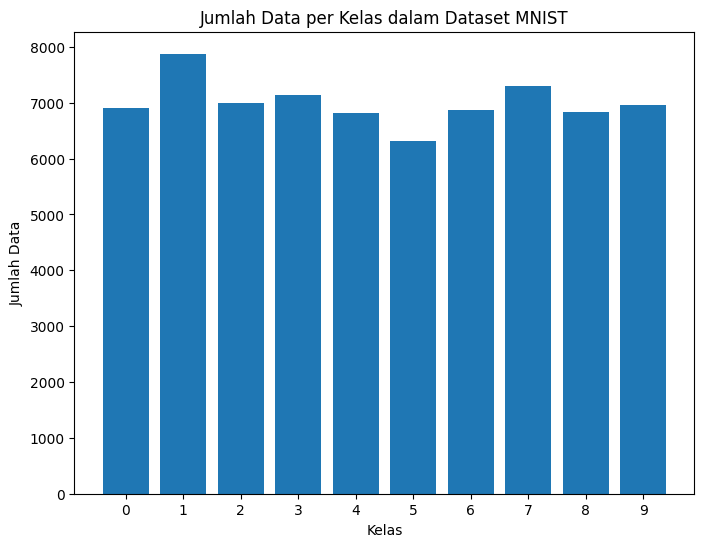

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Kelas dalam Dataset MNIST')
plt.xticks(class_counts.index)
plt.show()

Kesimpulan :


### 1.a Balancing Data

In [ ]:
from sklearn.datasets import fetch_openml
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

X = mnist_df.drop(columns=['target'])
y = mnist_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)


In [ ]:
class_counts_resampled = pd.Series(y_resampled).value_counts()
print(class_counts_resampled)

5    6277
4    6277
8    6277
0    6277
2    6277
6    6277
3    6277
1    6277
9    6277
7    6277
Name: target, dtype: int64


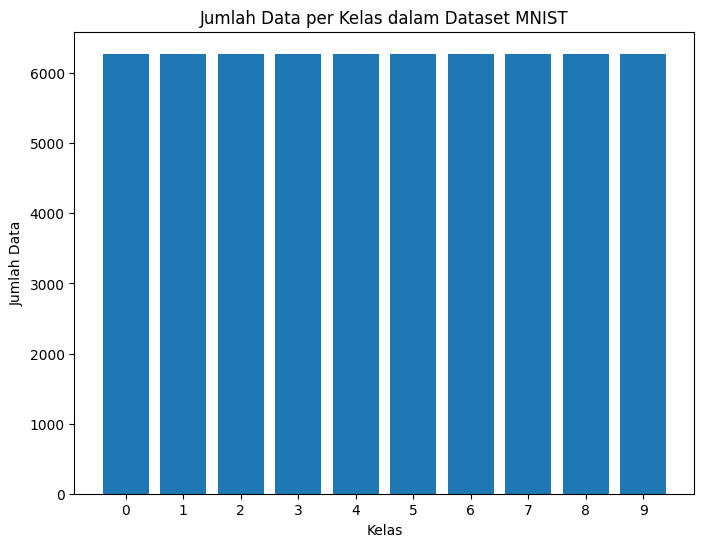

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index ,class_counts_resampled)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Kelas dalam Dataset MNIST')
plt.xticks(class_counts.index)
plt.show()

## 2 Menampilkan 15 Buah DataSet beserta labelnya

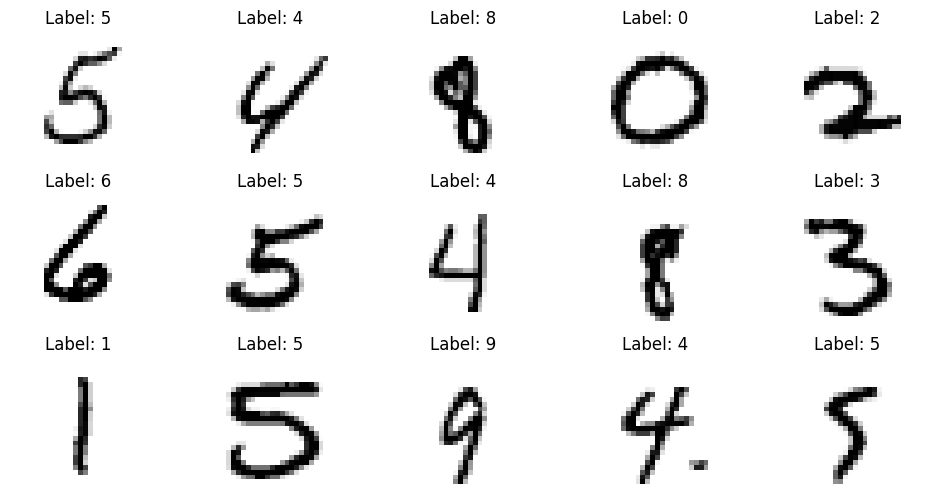

In [ ]:
import matplotlib.pyplot as plt

# Ambil 15 citra pertama dan labelnya
sample_images = X_train[:15]
sample_labels = y_train[:15]

# Definisikan kelas target dari MNIST
mnist_target_names = [str(i) for i in range(10)]

# Buat subplot 3x5 untuk menampilkan gambar
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images.iloc[i].values.reshape(28, 28), cmap=plt.cm.gray_r)
    plt.title(f"Label: {mnist_target_names[sample_labels.iloc[i]]}")
    plt.axis('off')

plt.show()


## 3 Lakukan proses ekstraksi fitur pada data MNIST

In [ ]:
from sklearn.decomposition import PCA
# Inisialisasi model PCA dengan komponen utama yang diinginkan
n_components = 15  # Ubah sesuai kebutuhan Anda
pca = PCA(n_components=n_components)

# Latih model PCA pada dataset MNIST
X_pca = pca.fit_transform(X)

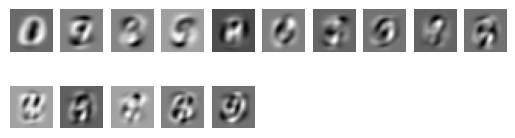

In [ ]:
# Visualisasikan beberapa komponen utama
for i in range(n_components):
    plt.subplot(5, 10, i + 1)
    plt.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

## 4 Membuat data training dan data testing untuk beberapa rasio

### Rasio 70:30

#### Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes Multinomial
model = MultinomialNB()

In [ ]:
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi label pada data pengujian
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Tampilkan laporan klasifikasi
report = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.8206149434443205
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      1904
           1       0.87      0.94      0.90      1895
           2       0.88      0.82      0.85      1853
           3       0.78      0.81      0.79      1878
           4       0.82      0.74      0.78      1866
           5       0.86      0.66      0.75      1947
           6       0.88      0.91      0.89      1901
           7       0.93      0.83      0.88      1865
           8       0.66      0.77      0.71      1876
           9       0.68      0.82      0.74      1846

    accuracy                           0.82     18831
   macro avg       0.83      0.82      0.82     18831
weighted avg       0.83      0.82      0.82     18831



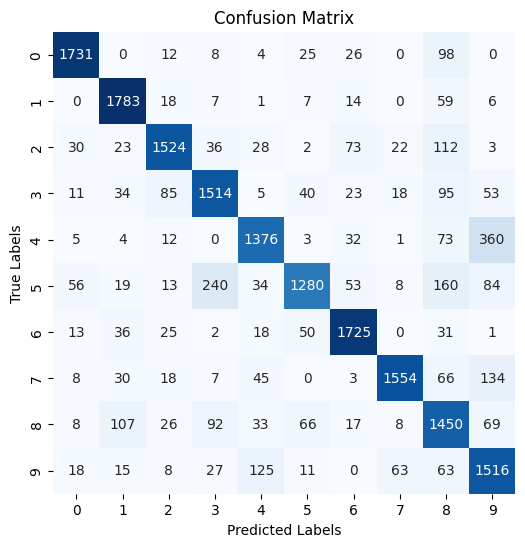

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tampilkan confusion matrix dalam bentuk heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#### Tampilkan Data Testing

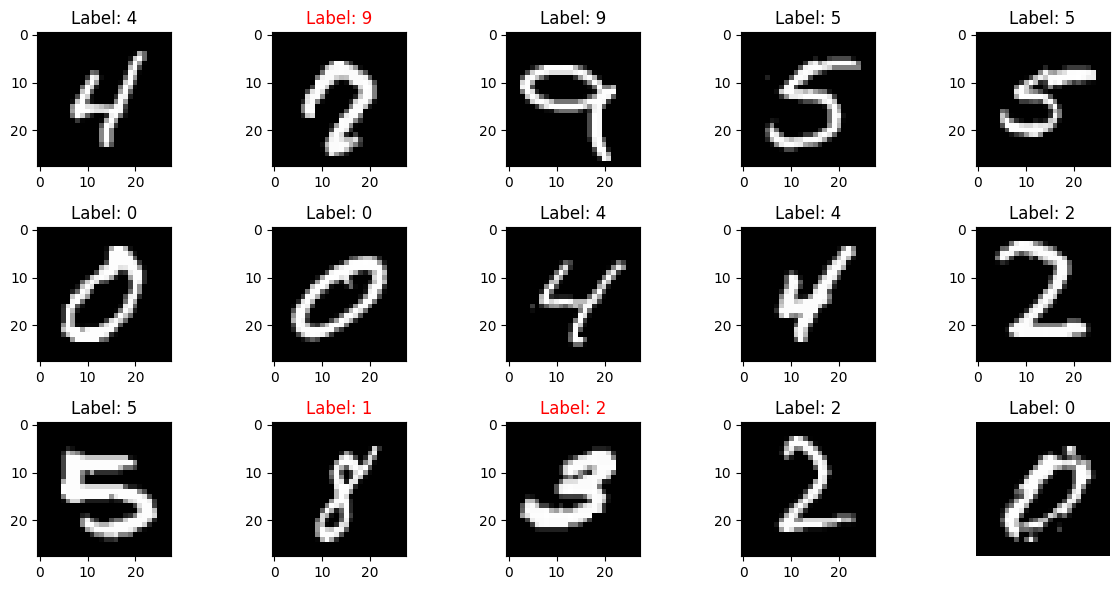

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menampilkan citra pada data testing dengan rasio 70:30
plt.figure(figsize=(12, 6))
num_rows = 3
num_cols = 5

for i in range(num_rows * num_cols):
      ax = plt.subplot(num_rows, num_cols, i + 1)
      img = np.array(X_test.iloc[i]).reshape(28, 28)
      ax.imshow(img, cmap='gray')
      ax.set_title(f'Label: {y_pred[i]}')
      if y_pred[i] != y_test.values[i]: ax.title.set_color('red')
ax.axis('off')
plt.tight_layout()
plt.show()

#### SVM


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.9287876374064044
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1904
           1       0.95      0.98      0.96      1895
           2       0.90      0.92      0.91      1853
           3       0.90      0.91      0.90      1878
           4       0.92      0.94      0.93      1866
           5       0.91      0.90      0.91      1947
           6       0.96      0.95      0.96      1901
           7       0.94      0.94      0.94      1865
           8       0.92      0.88      0.90      1876
           9       0.93      0.89      0.91      1846

    accuracy                           0.93     18831
   macro avg       0.93      0.93      0.93     18831
weighted avg       0.93      0.93      0.93     18831



#### Tampilkan Data Testing

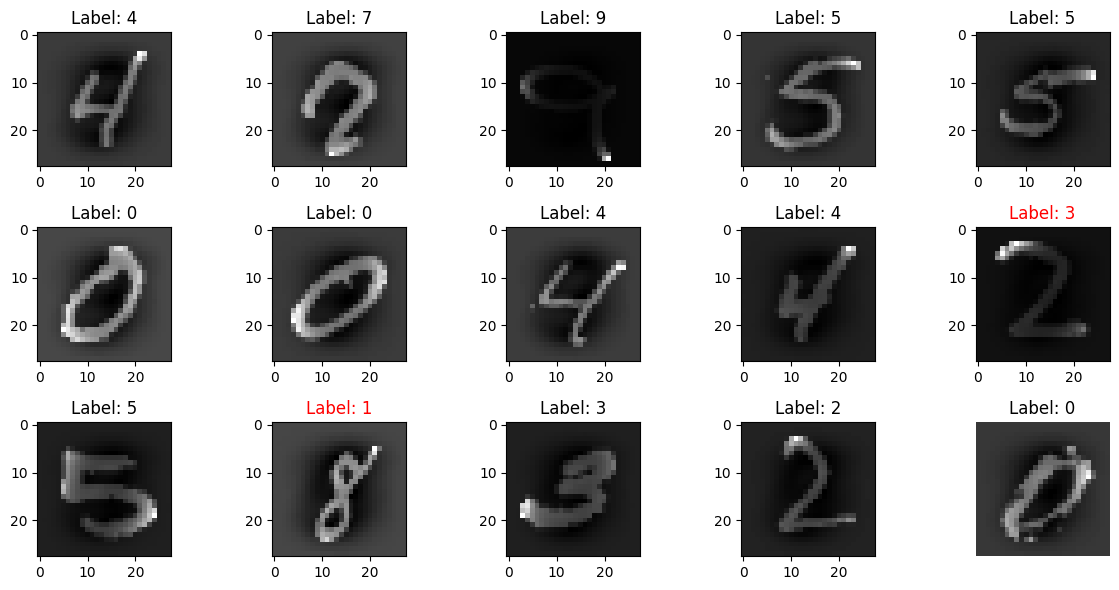

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menampilkan citra pada data testing dengan rasio 70:30
plt.figure(figsize=(12, 6))
num_rows = 3
num_cols = 5

for i in range(num_rows * num_cols):
      ax = plt.subplot(num_rows, num_cols, i + 1)
      img = np.array(X_test[i]).reshape(28, 28)
      ax.imshow(img, cmap='gray')
      ax.set_title(f'Label: {y_pred[i]}')
      if y_pred[i] != y_test.values[i]: ax.title.set_color('red')
ax.axis('off')
plt.tight_layout()
plt.show()

### Rasio 80:20

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes Multinomial
model = MultinomialNB()

In [ ]:
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi label pada data pengujian
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Tampilkan laporan klasifikasi
report = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.8219690935160109
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      1271
           1       0.87      0.94      0.91      1265
           2       0.88      0.82      0.85      1232
           3       0.78      0.81      0.79      1232
           4       0.83      0.74      0.79      1255
           5       0.86      0.66      0.75      1303
           6       0.87      0.91      0.89      1255
           7       0.94      0.84      0.89      1260
           8       0.65      0.78      0.71      1260
           9       0.68      0.83      0.75      1221

    accuracy                           0.82     12554
   macro avg       0.83      0.82      0.82     12554
weighted avg       0.83      0.82      0.82     12554



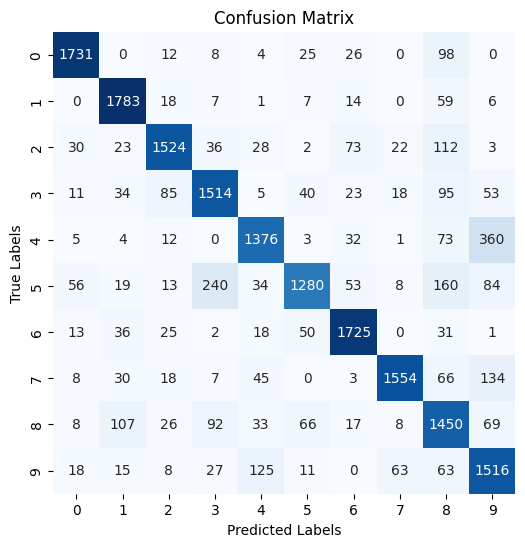

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tampilkan confusion matrix dalam bentuk heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#### Tampilkan Data Testing

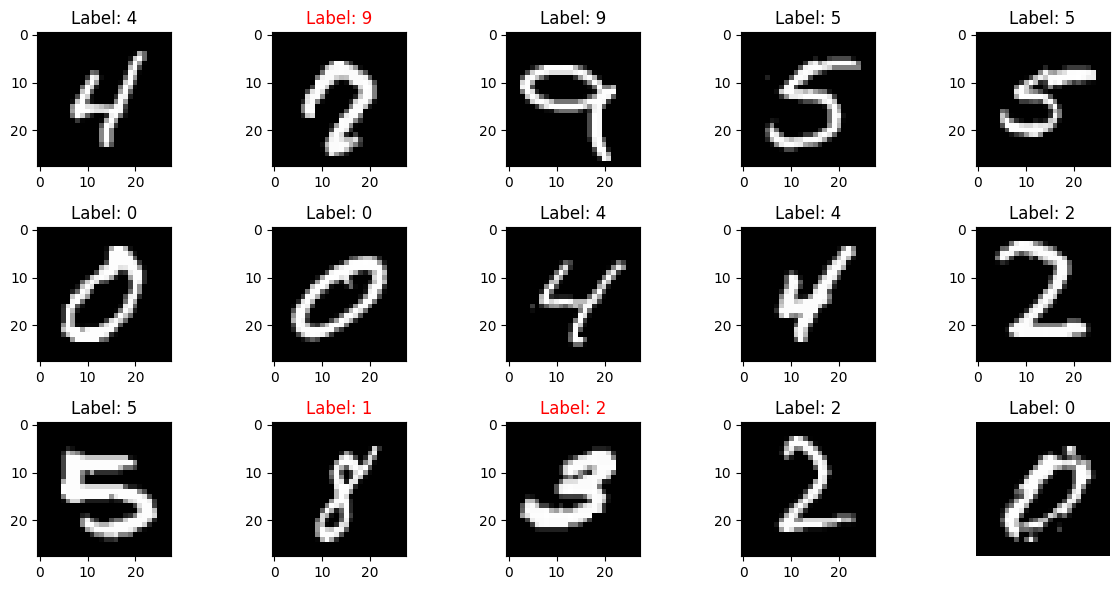

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menampilkan citra pada data testing dengan rasio 70:30
plt.figure(figsize=(12, 6))
num_rows = 3
num_cols = 5

for i in range(num_rows * num_cols):
      ax = plt.subplot(num_rows, num_cols, i + 1)
      img = np.array(X_test.iloc[i]).reshape(28, 28)
      ax.imshow(img, cmap='gray')
      ax.set_title(f'Label: {y_pred[i]}')
      if y_pred[i] != y_test.values[i]: ax.title.set_color('red')
ax.axis('off')
plt.tight_layout()
plt.show()

#### SVM

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.9346821730125856
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1271
           1       0.96      0.98      0.97      1265
           2       0.90      0.93      0.92      1232
           3       0.90      0.92      0.91      1232
           4       0.93      0.94      0.93      1255
           5       0.91      0.91      0.91      1303
           6       0.97      0.96      0.96      1255
           7       0.95      0.95      0.95      1260
           8       0.94      0.88      0.91      1260
           9       0.92      0.91      0.92      1221

    accuracy                           0.93     12554
   macro avg       0.93      0.93      0.93     12554
weighted avg       0.93      0.93      0.93     12554



#### Tampilkan Data Testing

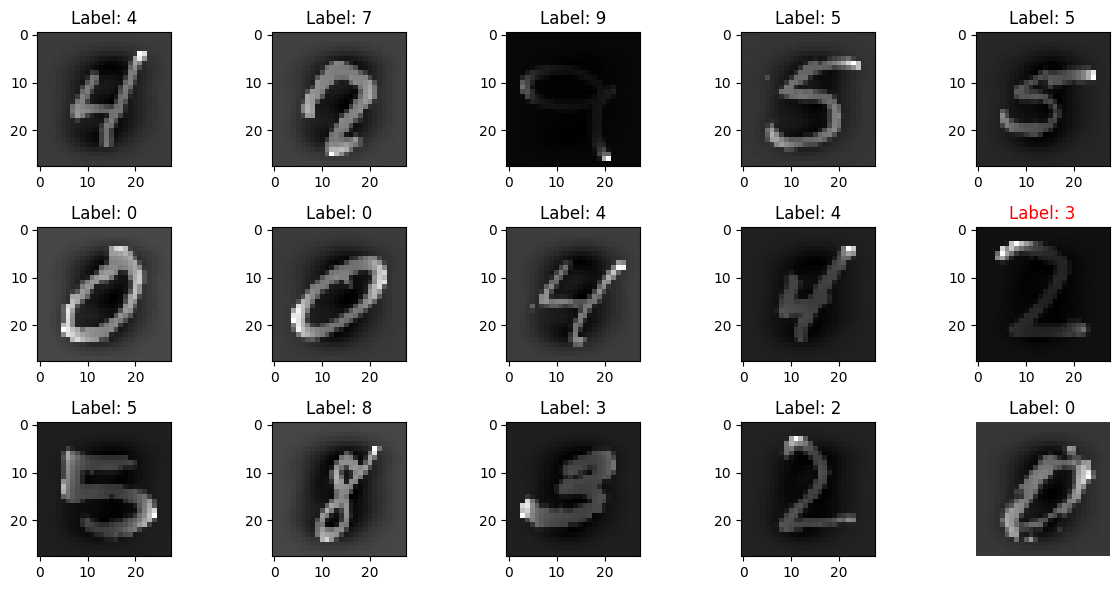

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menampilkan citra pada data testing dengan rasio 70:30
plt.figure(figsize=(12, 6))
num_rows = 3
num_cols = 5

for i in range(num_rows * num_cols):
      ax = plt.subplot(num_rows, num_cols, i + 1)
      img = np.array(X_test[i]).reshape(28, 28)
      ax.imshow(img, cmap='gray')
      ax.set_title(f'Label: {y_pred[i]}')
      if y_pred[i] != y_test.values[i]: ax.title.set_color('red')
ax.axis('off')
plt.tight_layout()
plt.show()

### Rasio 90:10

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes Multinomial
model = MultinomialNB()

In [ ]:
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi label pada data pengujian
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Tampilkan laporan klasifikasi
report = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.8294285714285714
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       683
           1       0.86      0.94      0.90       800
           2       0.87      0.82      0.85       674
           3       0.79      0.82      0.81       760
           4       0.83      0.74      0.79       611
           5       0.88      0.69      0.77       658
           6       0.86      0.91      0.89       677
           7       0.95      0.82      0.88       724
           8       0.67      0.76      0.71       693
           9       0.72      0.85      0.78       720

    accuracy                           0.83      7000
   macro avg       0.84      0.83      0.83      7000
weighted avg       0.84      0.83      0.83      7000



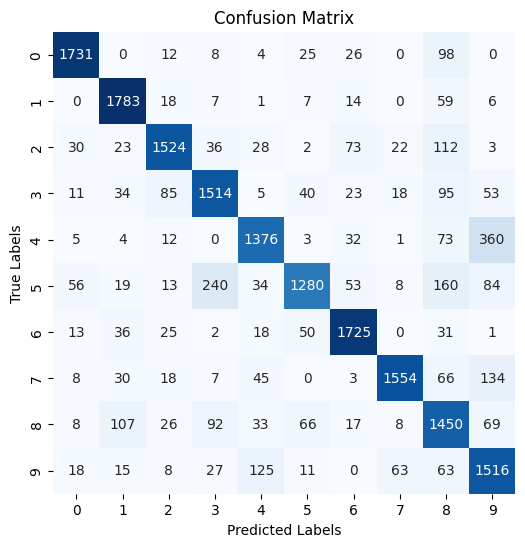

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#### Tampilkan Data testing


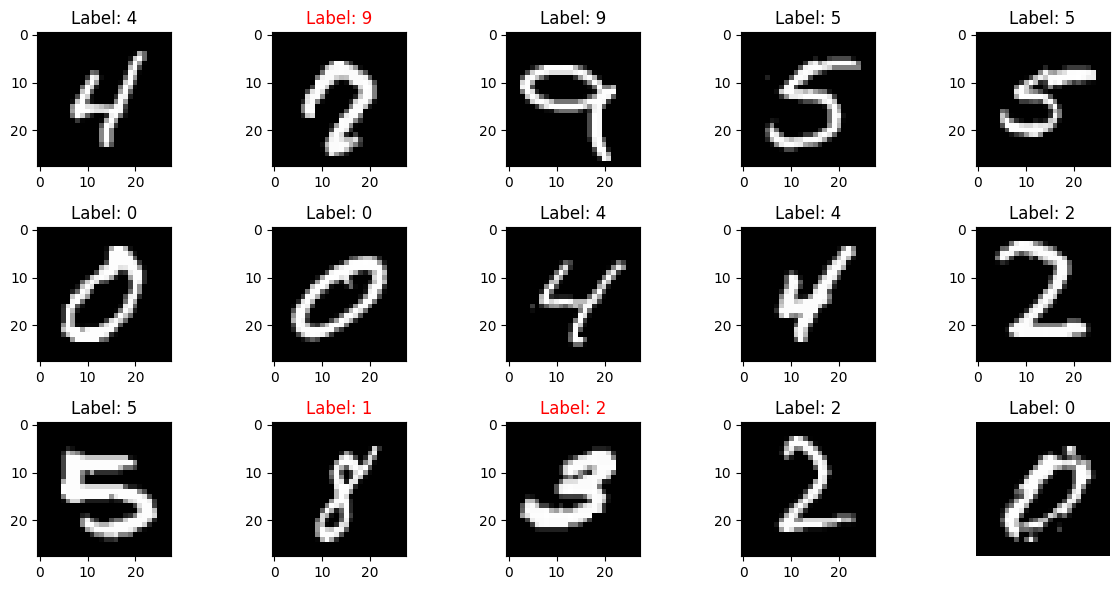

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menampilkan citra pada data testing dengan rasio 70:30
plt.figure(figsize=(12, 6))
num_rows = 3
num_cols = 5

for i in range(num_rows * num_cols):
      ax = plt.subplot(num_rows, num_cols, i + 1)
      img = np.array(X_test.iloc[i]).reshape(28, 28)
      ax.imshow(img, cmap='gray')
      ax.set_title(f'Label: {y_pred[i]}')
      if y_pred[i] != y_test.values[i]: ax.title.set_color('red')
ax.axis('off')
plt.tight_layout()
plt.show()

#### SVM

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.923
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       683
           1       0.95      0.98      0.97       800
           2       0.88      0.92      0.90       674
           3       0.88      0.91      0.90       760
           4       0.90      0.94      0.92       611
           5       0.90      0.88      0.89       658
           6       0.96      0.94      0.95       677
           7       0.95      0.93      0.94       724
           8       0.93      0.86      0.89       693
           9       0.94      0.90      0.92       720

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000



#### Tampilkan Data Testing

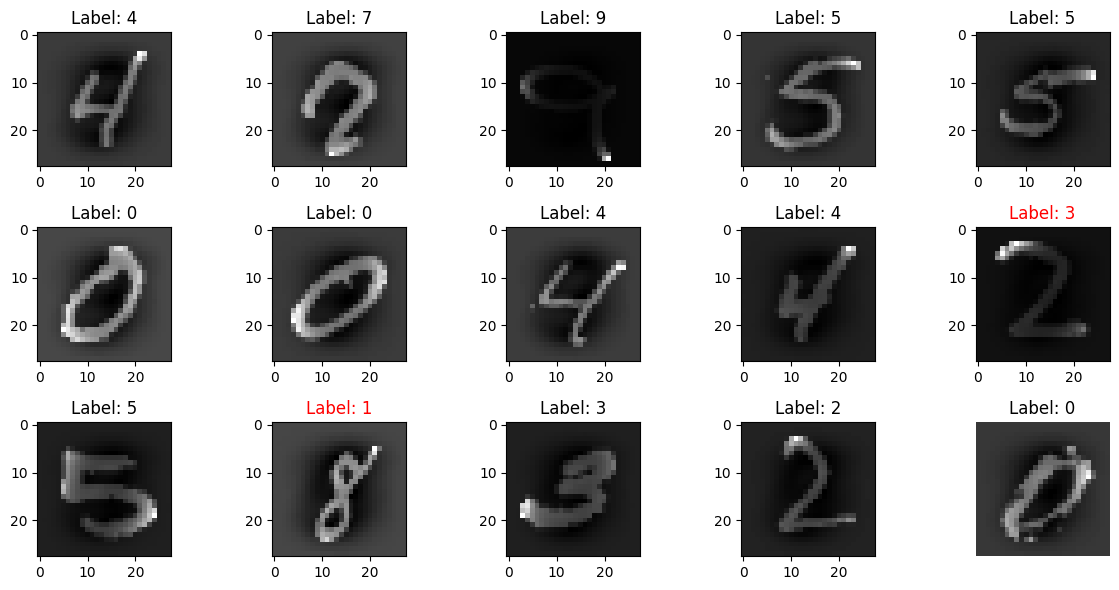

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menampilkan citra pada data testing dengan rasio 70:30
plt.figure(figsize=(12, 6))
num_rows = 3
num_cols = 5

for i in range(num_rows * num_cols):
      ax = plt.subplot(num_rows, num_cols, i + 1)
      img = np.array(X_test[i]).reshape(28, 28)
      ax.imshow(img, cmap='gray')
      ax.set_title(f'Label: {y_pred[i]}')
      if y_pred[i] != y_test.values[i]: ax.title.set_color('red')
ax.axis('off')
plt.tight_layout()
plt.show()